    year-month  arrivals  departure    total
0   2013-01-01   1757543    1803660  3534816
1   2013-02-01   1673383    1619140  3263834
2   2013-03-01   1779533    1615377  3367747
3   2013-04-01   1563269    1539928  3076025
4   2013-05-01   1577493    1551991  3099298
..         ...       ...        ...      ...
127 2023-08-01   2784436    2638304  5405083
128 2023-09-01   2350900    2478345  4811303
129 2023-10-01   2794395    2558248  5331724
130 2023-11-01   2496368    2566699  5043716
131 2023-12-01   2771118    2818244  5568128

[132 rows x 4 columns]
    year-month  temp  won exchange rate  100 yen exchange rate  \
0   2014-01-01  -0.7        1065.795000            1023.559000   
1   2014-02-01   1.9        1070.970000            1049.333000   
2   2014-03-01   7.9        1070.680000            1046.680000   
3   2014-04-01  14.0        1042.740000            1017.000000   
4   2014-05-01  18.9        1023.989474            1006.212105   
..         ...   ...                ... 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              346.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    4.88e-37
Time:                        23:24:35   Log-Likelihood:                         -1918.3
No. Observations:                 120   AIC:                                      3839.
Df Residuals:                     119   BIC:                                      3841.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.054e+04   1103.941     18.610      0.000    1.84e+04    2.27e+04
==============================================================================
Omnibus:                       32.012   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.223
Skew:                          -0.610   Prob(JB):                      0.00134
Kurtosis:                       1.924   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

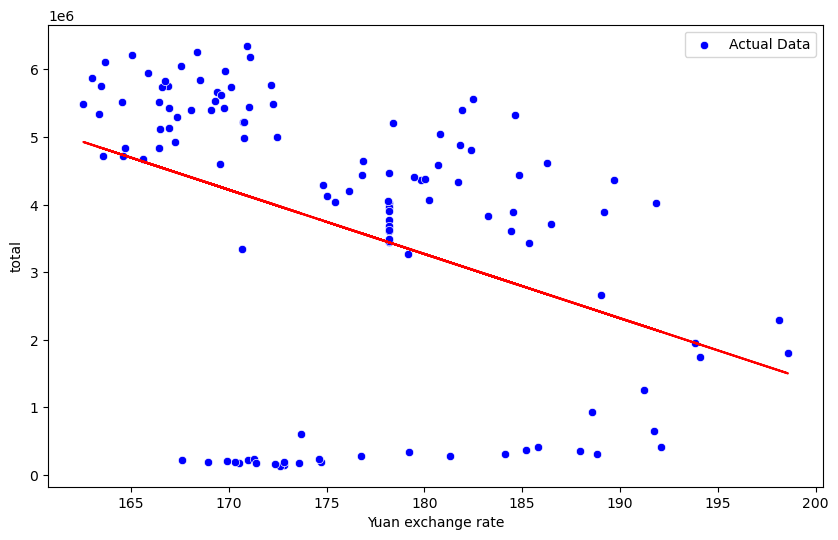

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 첫 번째 엑셀 파일 경로 지정
excel_file = 'C:/Users/emgkrla/Desktop/Data2/y.xlsx'

# 첫 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df1 = pd.read_excel(excel_file)
print(df1)

# 두 번째 엑셀 파일 경로 지정
excel_file1 = 'C:/Users/emgkrla/Desktop/Data2/x.xlsx'

# 두 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df2 = pd.read_excel(excel_file1)
print(df2)

# 데이터 시각화와 분석을 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 두 DataFrame을 'year-month' 열을 기준으로 병합
merged_data = pd.merge(df1, df2, on='year-month')
print(merged_data)

# 독립 변수(X)와 종속 변수(y) 설정
X = merged_data['Yuan exchange rate'].values.reshape(-1, 1)  # 'Yuan exchange rate'(위안 환율)를(을) 독립 변수로 설정
y = merged_data['total'].values  # 'total'(총합)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Yuan exchange rate'], y=merged_data['total'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['Yuan exchange rate'], y_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              347.0
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    4.49e-37
Time:                        23:25:33   Log-Likelihood:                         -1836.7
No. Observations:                 120   AIC:                                      3675.
Df Residuals:                     119   BIC:                                      3678.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.041e+04    559.066     18.628      0.000    9307.130    1.15e+04
==============================================================================
Omnibus:                       32.407   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.409
Skew:                          -0.616   Prob(JB):                      0.00123
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

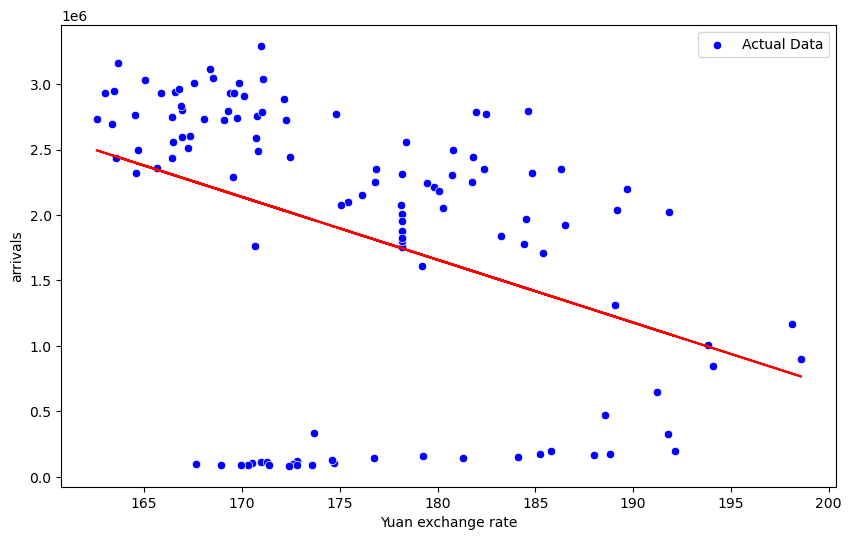

In [2]:
# 독립 변수(X)와 종속 변수(y1) 설정
X = merged_data['Yuan exchange rate'].values.reshape(-1, 1)  # 'Yuan exchange rate'(위안 환율)를(을) 독립 변수로 설정
y1 = merged_data['arrivals'].values  # 'arrivals'(도착)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y1)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y1_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Yuan exchange rate'], y=merged_data['arrivals'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['Yuan exchange rate'], y1_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y1, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              344.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    6.25e-37
Time:                        23:26:34   Log-Likelihood:                         -1835.4
No. Observations:                 120   AIC:                                      3673.
Df Residuals:                     119   BIC:                                      3676.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.026e+04    552.950     18.559      0.000    9167.074    1.14e+04
==============================================================================
Omnibus:                       31.925   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.055
Skew:                          -0.603   Prob(JB):                      0.00146
Kurtosis:                       1.924   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

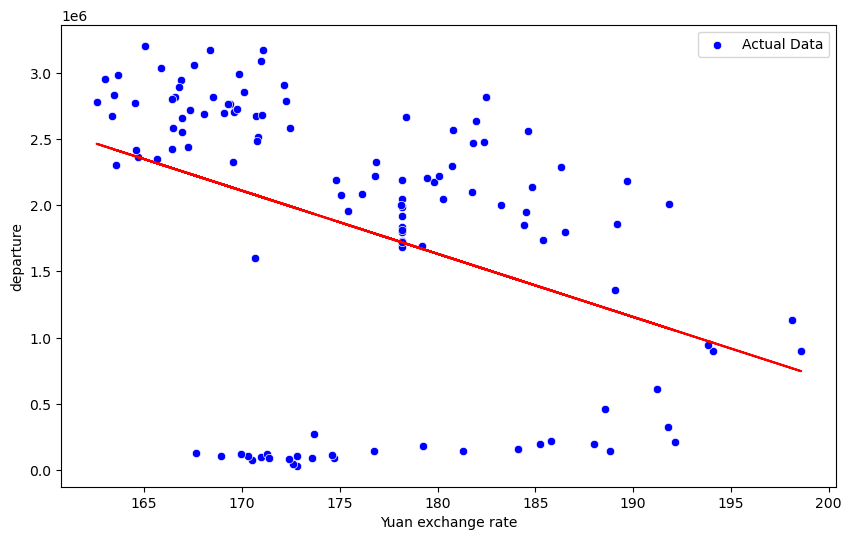

In [3]:
# 독립 변수(X)와 종속 변수(y2) 설정
X = merged_data['Yuan exchange rate'].values.reshape(-1, 1)  # 'Yuanexchange rate'(위안 환율)를(을) 독립 변수로 설정
y2 = merged_data['departure'].values  # 'departure'(출발)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y2)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y2_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Yuan exchange rate'], y=merged_data['departure'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['Yuan exchange rate'], y2_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y2, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()